In [1047]:
import pandas as pd
import numpy as np

In [1076]:

df = pd. read_csv('featuredtrain.csv')
df.head()


,status,departure_iataCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_icaoCode,arrival_terminal,arrival_scheduledTime,arrival_estimatedTime,airline_icaoCode,codeshared_airline_icaoCode,departure_scheduledDate,departure_estimatedDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,delay_minutes,delay_category,is_delay,hourly_delay_cate,departure_arrival,departure_arrival_encoded,country
0,active,lhe,m,2024-12-09 20:50:00,20:00:00,20:15:00,oerk,4,23:20:00,21:54:00,sva,NaN,20/07/2023,20/07/2023,20/07/2023,20/07/2023,20:15:00,20/07/2023,20:15:00,20/07/2023,20/07/2023,95,77,81,76.0,63,0,12,28.8,28.7,28.9,NaN,NaN,0.0,Low Delay,lhe -> oerk,122,Saudi Arabia
1,active,lhe,NaN,2024-12-09 15:05:00,15:05:00,NaN,opkc,NaN,16:50:00,NaN,fjl,NaN,18/07/2023,18/07/2023,NaN,NaN,NaN,NaN,NaN,18/07/2023,NaN,95,77,81,73.8,63,0,17,28.8,28.7,28.8,NaN,NaN,NaN,Severe Delay,lhe -> opkc,136,Pakistan
2,active,lhe,NaN,2024-12-09 09:50:00,NaN,NaN,opkc,NaN,11:35:00,NaN,fjl,NaN,23/07/2023,NaN,NaN,NaN,NaN,NaN,NaN,23/07/2023,NaN,95,73,79,71.2,56,0,14,28.9,28.8,29.0,NaN,NaN,NaN,Low Delay,lhe -> opkc,136,Pakistan
3,active,lhe,m,2024-12-09 23:30:00,23:30:00,23:51:00,okkk,NaN,1:30:00,1:24:00,pia,NaN,26/07/2023,26/07/2023,26/07/2023,26/07/2023,23:51:00,26/07/2023,23:51:00,27/07/2023,27/07/2023,93,75,82,77.4,59,0,17,28.9,28.8,28.9,21.0,High Delay,1.0,Severe Delay,lhe -> okkk,125,Pakistan
4,active,lhe,m,2024-12-09 11:35:00,17:15:00,NaN,omdb,1,14:00:00,NaN,sep,NaN,20/07/2023,20/07/2023,NaN,NaN,NaN,NaN,NaN,20/07/2023,NaN,95,77,81,76.0,63,0,12,28.8,28.7,28.9,NaN,NaN,NaN,Severe Delay,lhe -> omdb,127,Pakistan


In [1077]:

print( len(df) )

nulls = df.isnull().sum()
nulls_percentage = (df.isnull().mean()) * 100

missing_summary = pd.DataFrame({'Missing Values': nulls, 'Percentage Missing': nulls_percentage})

missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Percentage Missing', ascending=False)



51572


,Missing Values,Percentage Missing
codeshared_airline_icaoCode,35689,69.202280
arrival_terminal,31007,60.123711
delay_minutes,25183,48.830761
delay_category,25183,48.830761
departure_terminal,21750,42.174048
arrival_estimatedDate,21364,41.425580
arrival_estimatedTime,21364,41.425580
departure_actualDate,20582,39.909253
departure_actualRunwayTime,20582,39.909253
departure_actualRunwayDate,20582,39.909253


In [1078]:
df.columns

Index(['status', 'departure_iataCode', 'departure_terminal',
       'departure_scheduledTime', 'departure_estimatedTime',
       'departure_actualTime', 'arrival_icaoCode', 'arrival_terminal',
       'arrival_scheduledTime', 'arrival_estimatedTime', 'airline_icaoCode',
       'codeshared_airline_icaoCode', 'departure_scheduledDate',
       'departure_estimatedDate', 'departure_actualDate',
       'departure_estimatedRunwayDate', 'departure_estimatedRunwayTime',
       'departure_actualRunwayDate', 'departure_actualRunwayTime',
       'arrival_scheduledDate', 'arrival_estimatedDate',
       'Temperature (°F)_Max', 'Dew Point (°F)_Min', 'Dew Point (°F)_Max',
       'Humidity (%)_Avg', 'Humidity (%)_Min', 'Wind Speed (mph)_Min',
       'Wind Speed (mph)_Max', 'Pressure (in)_Avg', 'Pressure (in)_Min',
       'Pressure (in)_Max', 'delay_minutes', 'delay_category', 'is_delay',
       'hourly_delay_cate', 'departure_arrival', 'departure_arrival_encoded',
       'country'],
      dtype='object

In [1079]:
df = df.drop( columns = ['arrival_terminal', 'codeshared_airline_icaoCode', 'departure_iataCode',
                        'airline_icaoCode'
                        ] )

In [1080]:
df = df.drop( columns = ['status', 'hourly_delay_cate', 'departure_arrival', 'country',
                        'delay_category', 'delay_minutes'] )

In [1081]:
pd.set_option('display.max_columns', None)
df.head()


,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_icaoCode,arrival_scheduledTime,arrival_estimatedTime,departure_scheduledDate,departure_estimatedDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,is_delay,departure_arrival_encoded
0,m,2024-12-09 20:50:00,20:00:00,20:15:00,oerk,23:20:00,21:54:00,20/07/2023,20/07/2023,20/07/2023,20/07/2023,20:15:00,20/07/2023,20:15:00,20/07/2023,20/07/2023,95,77,81,76.0,63,0,12,28.8,28.7,28.9,0.0,122
1,NaN,2024-12-09 15:05:00,15:05:00,NaN,opkc,16:50:00,NaN,18/07/2023,18/07/2023,NaN,NaN,NaN,NaN,NaN,18/07/2023,NaN,95,77,81,73.8,63,0,17,28.8,28.7,28.8,NaN,136
2,NaN,2024-12-09 09:50:00,NaN,NaN,opkc,11:35:00,NaN,23/07/2023,NaN,NaN,NaN,NaN,NaN,NaN,23/07/2023,NaN,95,73,79,71.2,56,0,14,28.9,28.8,29.0,NaN,136
3,m,2024-12-09 23:30:00,23:30:00,23:51:00,okkk,1:30:00,1:24:00,26/07/2023,26/07/2023,26/07/2023,26/07/2023,23:51:00,26/07/2023,23:51:00,27/07/2023,27/07/2023,93,75,82,77.4,59,0,17,28.9,28.8,28.9,1.0,125
4,m,2024-12-09 11:35:00,17:15:00,NaN,omdb,14:00:00,NaN,20/07/2023,20/07/2023,NaN,NaN,NaN,NaN,NaN,20/07/2023,NaN,95,77,81,76.0,63,0,12,28.8,28.7,28.9,NaN,127


In [1082]:
for col in df.columns:
    print(col, df[col].unique())

departure_terminal ['m' nan 'main' 't1' '1' 'h' 'i']
departure_scheduledTime ['2024-12-09 20:50:00' '2024-12-09 15:05:00' '2024-12-09 09:50:00'
 '2024-12-09 23:30:00' '2024-12-09 11:35:00' '2024-12-09 09:00:00'
 '2024-12-09 11:40:00' '2024-12-09 09:25:00' '2024-12-09 22:00:00'
 '2024-12-09 20:30:00' '2024-12-09 10:45:00' '2024-12-09 21:10:00'
 '2024-12-09 04:15:00' '2024-12-09 03:30:00' '2024-12-09 09:55:00'
 '2024-12-09 04:00:00' '2024-12-09 21:45:00' '2024-12-09 08:30:00'
 '2024-12-09 04:50:00' '2024-12-09 16:15:00' '2024-12-09 19:25:00'
 '2024-12-09 10:30:00' '2024-12-09 16:45:00' '2024-12-09 05:20:00'
 '2024-12-09 13:10:00' '2024-12-09 01:00:00' '2024-12-09 02:35:00'
 '2024-12-09 23:40:00' '2024-12-09 17:00:00' '2024-12-09 02:25:00'
 '2024-12-09 13:00:00' '2024-12-09 14:15:00' '2024-12-09 03:50:00'
 '2024-12-09 22:10:00' '2024-12-09 04:25:00' '2024-12-09 01:50:00'
 '2024-12-09 19:45:00' '2024-12-09 22:20:00' '2024-12-09 21:20:00'
 '2024-12-09 01:45:00' '2024-12-09 00:20:00' '2024-1

In [1083]:

df['departure_scheduledTime'] = pd.to_datetime(df['departure_scheduledTime'], format='%Y-%m-%d %H:%M:%S')
df['departure_scheduledTime'] = df['departure_scheduledTime'].apply(lambda x: x.strftime('%H:%M:%S'))


df.head(3)

,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_icaoCode,arrival_scheduledTime,arrival_estimatedTime,departure_scheduledDate,departure_estimatedDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,is_delay,departure_arrival_encoded
0,m,20:50:00,20:00:00,20:15:00,oerk,23:20:00,21:54:00,20/07/2023,20/07/2023,20/07/2023,20/07/2023,20:15:00,20/07/2023,20:15:00,20/07/2023,20/07/2023,95,77,81,76.0,63,0,12,28.8,28.7,28.9,0.0,122
1,NaN,15:05:00,15:05:00,NaN,opkc,16:50:00,NaN,18/07/2023,18/07/2023,NaN,NaN,NaN,NaN,NaN,18/07/2023,NaN,95,77,81,73.8,63,0,17,28.8,28.7,28.8,NaN,136
2,NaN,09:50:00,NaN,NaN,opkc,11:35:00,NaN,23/07/2023,NaN,NaN,NaN,NaN,NaN,NaN,23/07/2023,NaN,95,73,79,71.2,56,0,14,28.9,28.8,29.0,NaN,136


In [1084]:

df_encoded = pd.get_dummies(df, columns=['departure_terminal'])

df_encoded.head()


,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_icaoCode,arrival_scheduledTime,arrival_estimatedTime,departure_scheduledDate,departure_estimatedDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,is_delay,departure_arrival_encoded,departure_terminal_1,departure_terminal_h,departure_terminal_i,departure_terminal_m,departure_terminal_main,departure_terminal_t1
0,20:50:00,20:00:00,20:15:00,oerk,23:20:00,21:54:00,20/07/2023,20/07/2023,20/07/2023,20/07/2023,20:15:00,20/07/2023,20:15:00,20/07/2023,20/07/2023,95,77,81,76.0,63,0,12,28.8,28.7,28.9,0.0,122,False,False,False,True,False,False
1,15:05:00,15:05:00,NaN,opkc,16:50:00,NaN,18/07/2023,18/07/2023,NaN,NaN,NaN,NaN,NaN,18/07/2023,NaN,95,77,81,73.8,63,0,17,28.8,28.7,28.8,NaN,136,False,False,False,False,False,False
2,09:50:00,NaN,NaN,opkc,11:35:00,NaN,23/07/2023,NaN,NaN,NaN,NaN,NaN,NaN,23/07/2023,NaN,95,73,79,71.2,56,0,14,28.9,28.8,29.0,NaN,136,False,False,False,False,False,False
3,23:30:00,23:30:00,23:51:00,okkk,1:30:00,1:24:00,26/07/2023,26/07/2023,26/07/2023,26/07/2023,23:51:00,26/07/2023,23:51:00,27/07/2023,27/07/2023,93,75,82,77.4,59,0,17,28.9,28.8,28.9,1.0,125,False,False,False,True,False,False
4,11:35:00,17:15:00,NaN,omdb,14:00:00,NaN,20/07/2023,20/07/2023,NaN,NaN,NaN,NaN,NaN,20/07/2023,NaN,95,77,81,76.0,63,0,12,28.8,28.7,28.9,NaN,127,False,False,False,True,False,False


In [1085]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_encoded['arrival_icaoCode_encoded'] = encoder.fit_transform(df['arrival_icaoCode'].fillna('Unknown'))
print(df_encoded[['arrival_icaoCode', 'arrival_icaoCode_encoded']].head())


# df_encoded['airline_icaoCode_encoded'] = encoder.fit_transform(df['airline_icaoCode'].fillna('Unknown'))
# print(df_encoded[['airline_icaoCode', 'airline_icaoCode_encoded']].head())

df_encoded = df_encoded.drop(columns = [ 'arrival_icaoCode'])


  arrival_icaoCode  arrival_icaoCode_encoded
0             oerk                        31
1             opkc                        50
2             opkc                        50
3             okkk                        35
4             omdb                        38


In [1086]:
df_encoded.head()

,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_scheduledTime,arrival_estimatedTime,departure_scheduledDate,departure_estimatedDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,is_delay,departure_arrival_encoded,departure_terminal_1,departure_terminal_h,departure_terminal_i,departure_terminal_m,departure_terminal_main,departure_terminal_t1,arrival_icaoCode_encoded
0,20:50:00,20:00:00,20:15:00,23:20:00,21:54:00,20/07/2023,20/07/2023,20/07/2023,20/07/2023,20:15:00,20/07/2023,20:15:00,20/07/2023,20/07/2023,95,77,81,76.0,63,0,12,28.8,28.7,28.9,0.0,122,False,False,False,True,False,False,31
1,15:05:00,15:05:00,NaN,16:50:00,NaN,18/07/2023,18/07/2023,NaN,NaN,NaN,NaN,NaN,18/07/2023,NaN,95,77,81,73.8,63,0,17,28.8,28.7,28.8,NaN,136,False,False,False,False,False,False,50
2,09:50:00,NaN,NaN,11:35:00,NaN,23/07/2023,NaN,NaN,NaN,NaN,NaN,NaN,23/07/2023,NaN,95,73,79,71.2,56,0,14,28.9,28.8,29.0,NaN,136,False,False,False,False,False,False,50
3,23:30:00,23:30:00,23:51:00,1:30:00,1:24:00,26/07/2023,26/07/2023,26/07/2023,26/07/2023,23:51:00,26/07/2023,23:51:00,27/07/2023,27/07/2023,93,75,82,77.4,59,0,17,28.9,28.8,28.9,1.0,125,False,False,False,True,False,False,35
4,11:35:00,17:15:00,NaN,14:00:00,NaN,20/07/2023,20/07/2023,NaN,NaN,NaN,NaN,NaN,20/07/2023,NaN,95,77,81,76.0,63,0,12,28.8,28.7,28.9,NaN,127,False,False,False,True,False,False,38


In [1087]:

print( len(df_encoded) )

nulls = df_encoded.isnull().sum()
nulls_percentage = (df_encoded.isnull().mean()) * 100

missing_summary = pd.DataFrame({'Missing Values': nulls, 'Percentage Missing': nulls_percentage})

missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Percentage Missing', ascending=False)



51572


,Missing Values,Percentage Missing
arrival_estimatedTime,21364,41.425580
arrival_estimatedDate,21364,41.425580
departure_actualTime,20582,39.909253
departure_actualRunwayTime,20582,39.909253
departure_actualDate,20582,39.909253
departure_estimatedRunwayTime,20582,39.909253
departure_estimatedRunwayDate,20582,39.909253
is_delay,20582,39.909253
departure_actualRunwayDate,20582,39.909253
departure_estimatedTime,7007,13.586830


In [1088]:

df_encoded = df_encoded.dropna(subset=['arrival_estimatedTime', 'arrival_estimatedDate', 'departure_estimatedRunwayDate', 
                                    'departure_estimatedDate', 'departure_estimatedRunwayTime', 'departure_estimatedTime'
                                    ])


In [1089]:
# # Convert date columns to datetime (handle day-first format explicitly)
date_columns = ['departure_scheduledDate', 'departure_actualDate',
                'departure_estimatedRunwayDate', 
                'departure_estimatedDate','arrival_scheduledDate', 'arrival_estimatedDate', 'departure_actualRunwayDate']  

for col in date_columns:
    df_encoded[col] = pd.to_datetime(df_encoded[col], dayfirst=True, errors='coerce').astype(int, errors='ignore')

# for col in date_columns:
#     df_encoded[col] = pd.to_datetime(df_encoded[col], dayfirst=True, errors='coerce')
#     df_encoded[f'{col}_ordinal'] = df_encoded[col].apply(lambda x: x.toordinal() if pd.notnull(x) else None)
#     df_encoded.drop(col, axis=1, inplace=True)  # Optional


# Convert time columns to total seconds
time_columns = [ 'departure_actualTime', 'arrival_scheduledTime', 'departure_scheduledTime',
                'departure_estimatedRunwayTime',
                'departure_estimatedTime', 'arrival_estimatedTime', 'departure_actualRunwayTime']

for col in time_columns:
    df_encoded[col] = pd.to_timedelta(df_encoded[col], errors='coerce').dt.total_seconds()

# Check the result
df_encoded.head()


,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_scheduledTime,arrival_estimatedTime,departure_scheduledDate,departure_estimatedDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,is_delay,departure_arrival_encoded,departure_terminal_1,departure_terminal_h,departure_terminal_i,departure_terminal_m,departure_terminal_main,departure_terminal_t1,arrival_icaoCode_encoded
0,75000.0,72000.0,72900.0,84000.0,78840.0,1689811200000000000,1689811200000000000,1689811200000000000,1689811200000000000,72900.0,1689811200000000000,72900.0,1689811200000000000,1689811200000000000,95,77,81,76.0,63,0,12,28.8,28.7,28.9,0.0,122,False,False,False,True,False,False,31
3,84600.0,84600.0,85860.0,5400.0,5040.0,1690329600000000000,1690329600000000000,1690329600000000000,1690329600000000000,85860.0,1690329600000000000,85860.0,1690416000000000000,1690416000000000000,93,75,82,77.4,59,0,17,28.9,28.8,28.9,1.0,125,False,False,False,True,False,False,35
10,38700.0,38700.0,39240.0,47400.0,45840.0,1690156800000000000,1690156800000000000,1690156800000000000,1690156800000000000,39240.0,1690156800000000000,39240.0,1690156800000000000,1690156800000000000,97,75,82,74.3,60,0,28,28.9,28.8,28.9,1.0,141,False,False,False,False,False,False,61
14,12600.0,12600.0,12960.0,19800.0,16680.0,1690416000000000000,1690416000000000000,1690416000000000000,1690416000000000000,12960.0,1690416000000000000,12960.0,1690416000000000000,1690416000000000000,88,73,79,83.7,70,0,16,28.9,28.8,28.9,1.0,143,False,False,False,True,False,False,65
16,76200.0,76200.0,75960.0,83400.0,79740.0,1689984000000000000,1689984000000000000,1689984000000000000,1689984000000000000,75960.0,1689984000000000000,75960.0,1689984000000000000,1689984000000000000,82,73,79,90.3,83,3,21,26.6,0.0,29.0,0.0,143,False,False,False,True,False,False,65


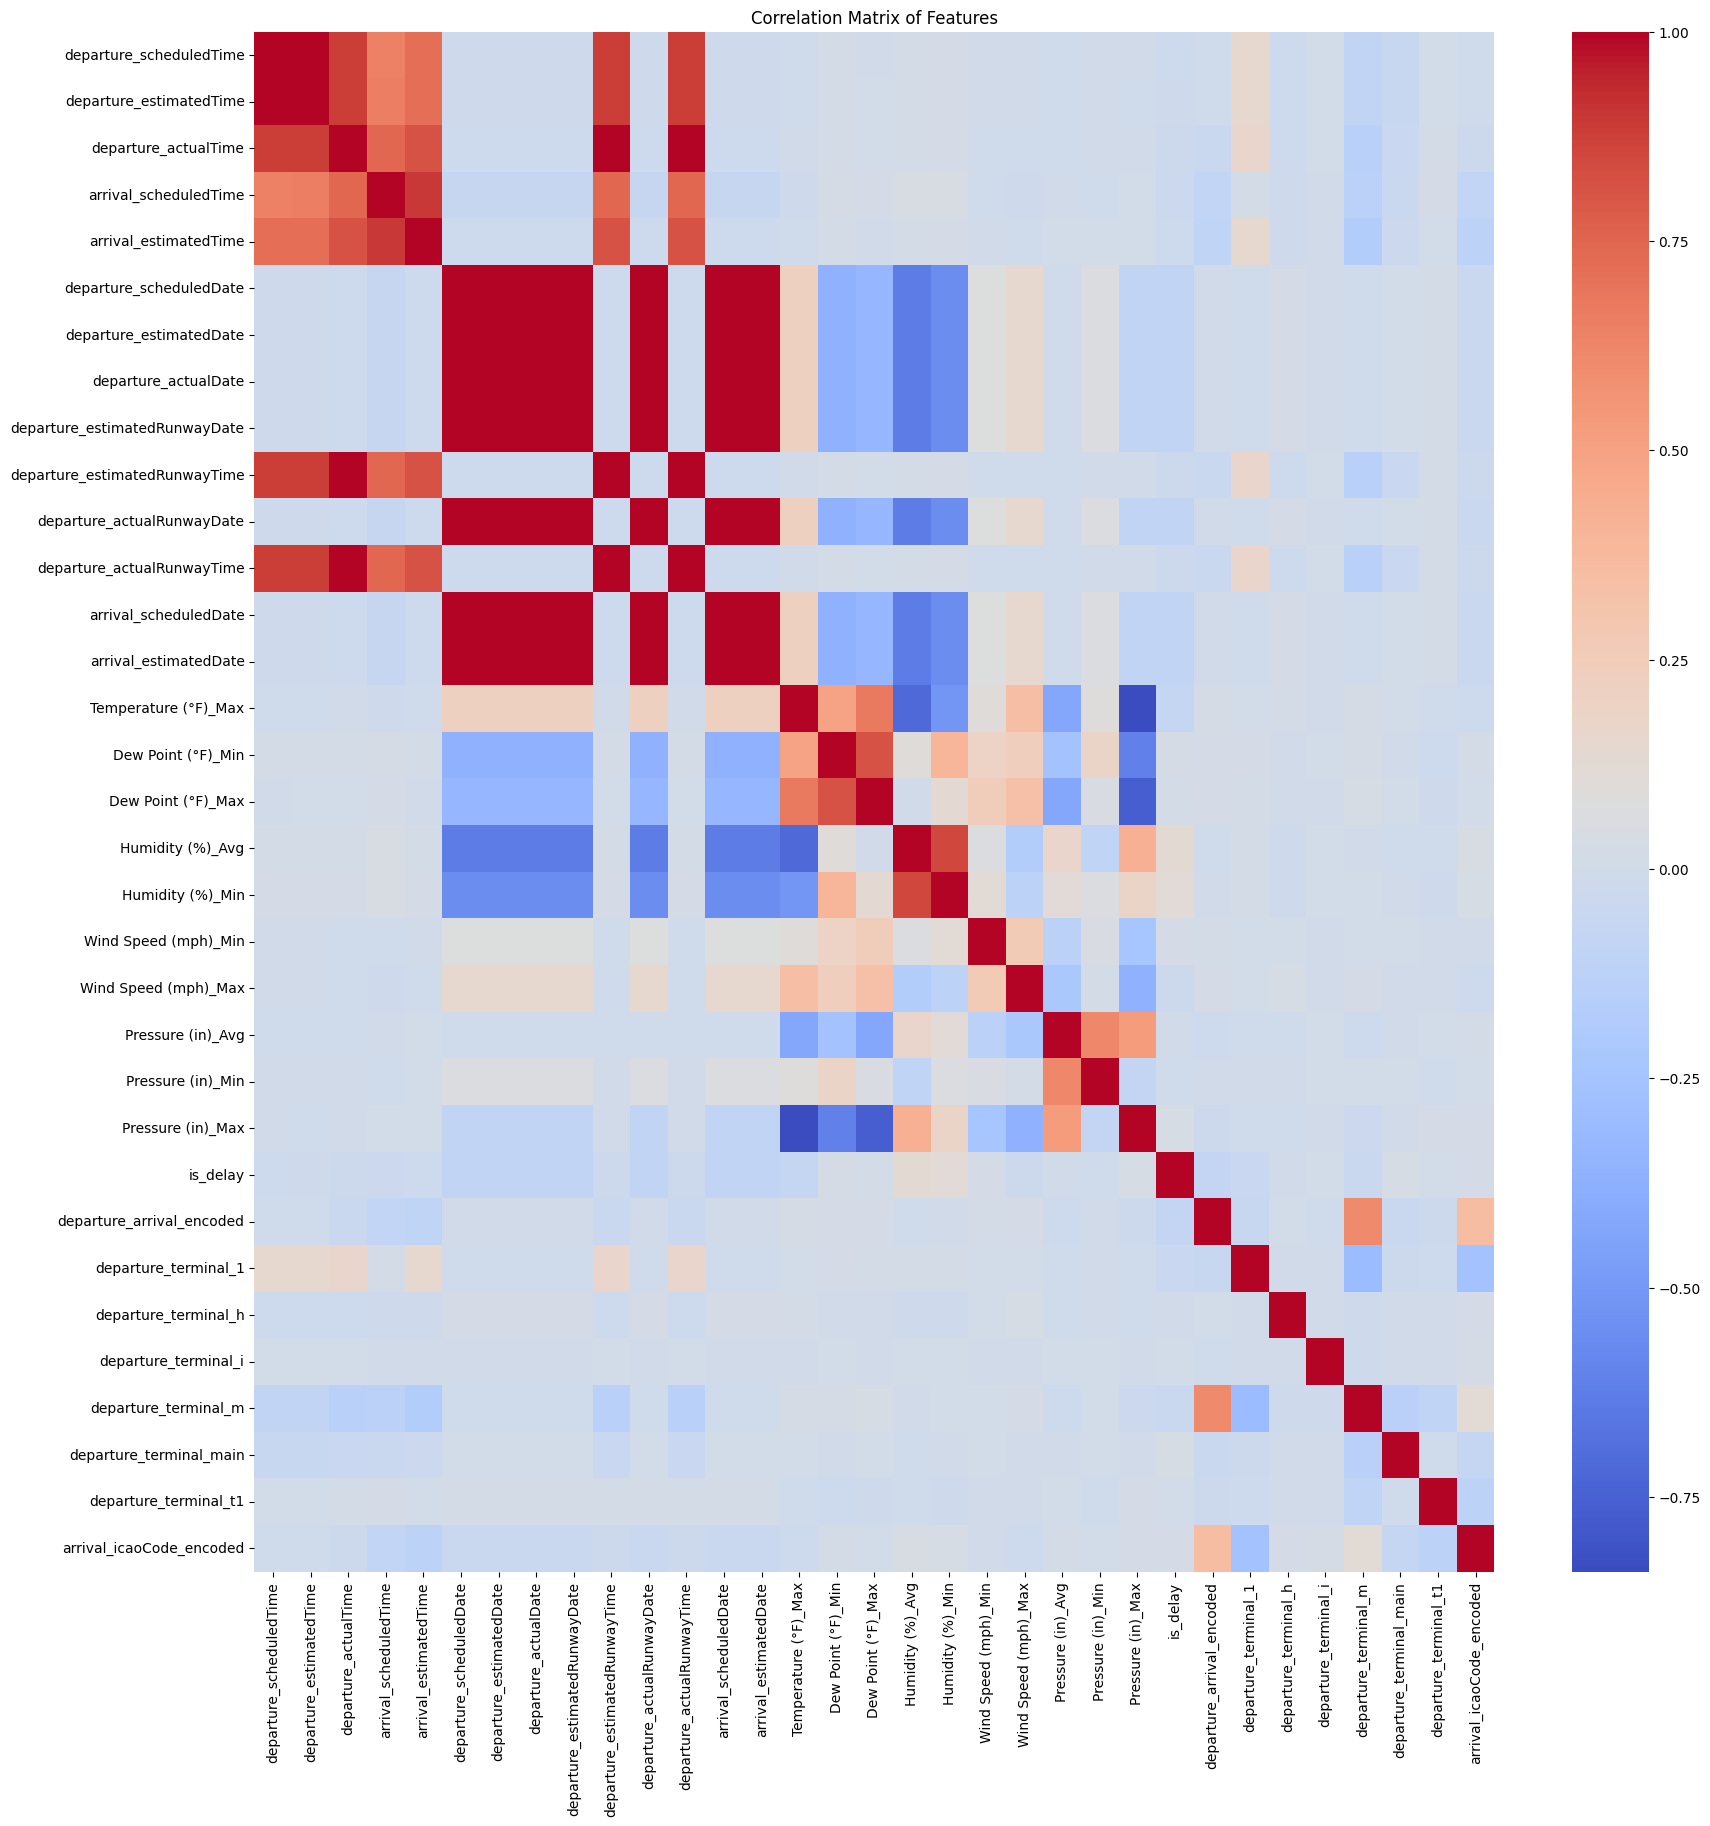

In [1090]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()



In [1091]:
df_encoded.head()

,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_scheduledTime,arrival_estimatedTime,departure_scheduledDate,departure_estimatedDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,is_delay,departure_arrival_encoded,departure_terminal_1,departure_terminal_h,departure_terminal_i,departure_terminal_m,departure_terminal_main,departure_terminal_t1,arrival_icaoCode_encoded
0,75000.0,72000.0,72900.0,84000.0,78840.0,1689811200000000000,1689811200000000000,1689811200000000000,1689811200000000000,72900.0,1689811200000000000,72900.0,1689811200000000000,1689811200000000000,95,77,81,76.0,63,0,12,28.8,28.7,28.9,0.0,122,False,False,False,True,False,False,31
3,84600.0,84600.0,85860.0,5400.0,5040.0,1690329600000000000,1690329600000000000,1690329600000000000,1690329600000000000,85860.0,1690329600000000000,85860.0,1690416000000000000,1690416000000000000,93,75,82,77.4,59,0,17,28.9,28.8,28.9,1.0,125,False,False,False,True,False,False,35
10,38700.0,38700.0,39240.0,47400.0,45840.0,1690156800000000000,1690156800000000000,1690156800000000000,1690156800000000000,39240.0,1690156800000000000,39240.0,1690156800000000000,1690156800000000000,97,75,82,74.3,60,0,28,28.9,28.8,28.9,1.0,141,False,False,False,False,False,False,61
14,12600.0,12600.0,12960.0,19800.0,16680.0,1690416000000000000,1690416000000000000,1690416000000000000,1690416000000000000,12960.0,1690416000000000000,12960.0,1690416000000000000,1690416000000000000,88,73,79,83.7,70,0,16,28.9,28.8,28.9,1.0,143,False,False,False,True,False,False,65
16,76200.0,76200.0,75960.0,83400.0,79740.0,1689984000000000000,1689984000000000000,1689984000000000000,1689984000000000000,75960.0,1689984000000000000,75960.0,1689984000000000000,1689984000000000000,82,73,79,90.3,83,3,21,26.6,0.0,29.0,0.0,143,False,False,False,True,False,False,65


In [1092]:
# Drop rows with missing values in the specified columns
columns_to_drop = [
    'is_delay', 'departure_actualTime', 'departure_actualDate', 'departure_actualRunwayDate', 'departure_actualRunwayTime'
]



df_encoded = df_encoded.dropna(subset=columns_to_drop)

# Verify the result
print(df_encoded.isnull().sum())


departure_scheduledTime          0
departure_estimatedTime          0
departure_actualTime             0
arrival_scheduledTime            0
arrival_estimatedTime            0
departure_scheduledDate          0
departure_estimatedDate          0
departure_actualDate             0
departure_estimatedRunwayDate    0
departure_estimatedRunwayTime    0
departure_actualRunwayDate       0
departure_actualRunwayTime       0
arrival_scheduledDate            0
arrival_estimatedDate            0
Temperature (°F)_Max             0
Dew Point (°F)_Min               0
Dew Point (°F)_Max               0
Humidity (%)_Avg                 0
Humidity (%)_Min                 0
Wind Speed (mph)_Min             0
Wind Speed (mph)_Max             0
Pressure (in)_Avg                0
Pressure (in)_Min                0
Pressure (in)_Max                0
is_delay                         0
departure_arrival_encoded        0
departure_terminal_1             0
departure_terminal_h             0
departure_terminal_i

In [1093]:

# Step 1: Prepare the features (X) and target variable (y)
X = df_encoded.drop(['is_delay', 'departure_actualTime', 'departure_actualDate', 
                    'departure_estimatedTime', 'departure_estimatedDate' ], axis=1)  # Drop the target column 'is_delay' from features
y = df_encoded['is_delay']  # The target column

X.head(3)

,departure_scheduledTime,arrival_scheduledTime,arrival_estimatedTime,departure_scheduledDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,departure_arrival_encoded,departure_terminal_1,departure_terminal_h,departure_terminal_i,departure_terminal_m,departure_terminal_main,departure_terminal_t1,arrival_icaoCode_encoded
0,75000.0,84000.0,78840.0,1689811200000000000,1689811200000000000,72900.0,1689811200000000000,72900.0,1689811200000000000,1689811200000000000,95,77,81,76.0,63,0,12,28.8,28.7,28.9,122,False,False,False,True,False,False,31
3,84600.0,5400.0,5040.0,1690329600000000000,1690329600000000000,85860.0,1690329600000000000,85860.0,1690416000000000000,1690416000000000000,93,75,82,77.4,59,0,17,28.9,28.8,28.9,125,False,False,False,True,False,False,35
10,38700.0,47400.0,45840.0,1690156800000000000,1690156800000000000,39240.0,1690156800000000000,39240.0,1690156800000000000,1690156800000000000,97,75,82,74.3,60,0,28,28.9,28.8,28.9,141,False,False,False,False,False,False,61


In [1097]:
X.columns

Index(['departure_scheduledTime', 'arrival_scheduledTime',
       'arrival_estimatedTime', 'departure_scheduledDate',
       'departure_estimatedRunwayDate', 'departure_estimatedRunwayTime',
       'departure_actualRunwayDate', 'departure_actualRunwayTime',
       'arrival_scheduledDate', 'arrival_estimatedDate',
       'Temperature (°F)_Max', 'Dew Point (°F)_Min', 'Dew Point (°F)_Max',
       'Humidity (%)_Avg', 'Humidity (%)_Min', 'Wind Speed (mph)_Min',
       'Wind Speed (mph)_Max', 'Pressure (in)_Avg', 'Pressure (in)_Min',
       'Pressure (in)_Max', 'departure_arrival_encoded',
       'departure_terminal_1', 'departure_terminal_h', 'departure_terminal_i',
       'departure_terminal_m', 'departure_terminal_main',
       'departure_terminal_t1', 'arrival_icaoCode_encoded'],
      dtype='object')

Accuracy: 0.95

Confusion Matrix:
[[ 552  284]
 [  14 4968]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.66      0.79       836
         1.0       0.95      1.00      0.97      4982

    accuracy                           0.95      5818
   macro avg       0.96      0.83      0.88      5818
weighted avg       0.95      0.95      0.94      5818



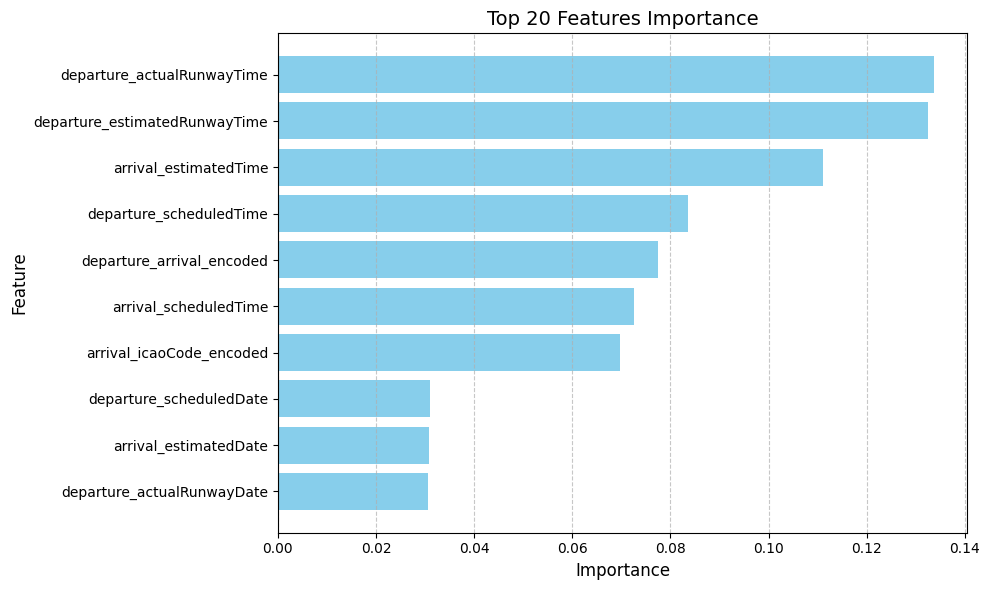

In [1095]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    min_samples_split=5, 
    random_state=42
)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_20_features = feature_importance.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Features Importance', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the RandomForest model
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    random_state=42
)

# Define K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='accuracy')

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(cv_scores)
std_dev = np.std(cv_scores)

print(f"K-Fold Mean Accuracy: {mean_accuracy:.4f}")
print(f"K-Fold Accuracy Standard Deviation: {std_dev:.4f}")


K-Fold Mean Accuracy: 0.9393
K-Fold Accuracy Standard Deviation: 0.0021


# Feature Filling 

In [474]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

import pandas as pd


# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the KNN classifier (you can adjust the value of k)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 5: Predict and evaluate the model
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8632
              precision    recall  f1-score   support

         0.0       0.54      0.35      0.42       836
         1.0       0.90      0.95      0.92      4982

    accuracy                           0.86      5818
   macro avg       0.72      0.65      0.67      5818
weighted avg       0.85      0.86      0.85      5818

Confusion Matrix:
[[ 293  543]
 [ 253 4729]]


In [475]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the Perceptron classifier
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train_scaled, y_train)

# Step 5: Predict and evaluate the model
y_pred = perceptron.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

# Step 6: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7831
              precision    recall  f1-score   support

         0.0       0.26      0.29      0.28       836
         1.0       0.88      0.87      0.87      4982

    accuracy                           0.78      5818
   macro avg       0.57      0.58      0.57      5818
weighted avg       0.79      0.78      0.79      5818

Confusion Matrix:
[[ 240  596]
 [ 666 4316]]


In [228]:
X.head(3)

,departure_actualTime,arrival_scheduledTime,arrival_estimatedTime,departure_scheduledDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,delay_minutes,is_delay,departure_iataCode_isb,departure_iataCode_khi,departure_iataCode_lhe,departure_terminal_1,departure_terminal_h,departure_terminal_i,departure_terminal_m,departure_terminal_main,departure_terminal_t1,arrival_terminal_1,arrival_terminal_2,arrival_terminal_3,arrival_terminal_4,arrival_terminal_5,arrival_terminal_a,arrival_terminal_h,arrival_terminal_i,arrival_terminal_m,arrival_terminal_n,arrival_terminal_t2,arrival_terminal_t3,arrival_terminal_t4,arrival_terminal_ta,hourly_delay_cate_Extreme Delay,hourly_delay_cate_High Delay,hourly_delay_cate_Low Delay,hourly_delay_cate_Severe Delay,delay_category_High Delay,delay_category_Low Delay,delay_category_Medium Delay,delay_category_Very High Delay,codeshared_airline_icaoCode_alk,codeshared_airline_icaoCode_baw,codeshared_airline_icaoCode_cca,codeshared_airline_icaoCode_csn,codeshared_airline_icaoCode_etd,codeshared_airline_icaoCode_exv,codeshared_airline_icaoCode_fdb,codeshared_airline_icaoCode_gfa,codeshared_airline_icaoCode_kne,codeshared_airline_icaoCode_oma,codeshared_airline_icaoCode_oms,codeshared_airline_icaoCode_pia,codeshared_airline_icaoCode_qtr,codeshared_airline_icaoCode_sva,codeshared_airline_icaoCode_tha,codeshared_airline_icaoCode_thy,codeshared_airline_icaoCode_tvs,codeshared_airline_icaoCode_uae,arrival_icaoCode_encoded,airline_icaoCode_encoded,departure_arrival_encoded,country_encoded
0,72900.0,84000.0,78840.0,2023-07-20,2023-07-20,2023-07-20,72900.0,2023-07-20,72900.0,2023-07-20,2023-07-20,95,77,81,76.0,63,0,12,28.8,28.7,28.9,0.0,0.0,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,30,78,109,35
3,85860.0,5400.0,5040.0,2023-07-26,2023-07-26,2023-07-26,85860.0,2023-07-26,85860.0,2023-07-27,2023-07-27,93,75,82,77.4,59,0,17,28.9,28.8,28.9,21.0,1.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,32,61,111,30
10,39240.0,47400.0,45840.0,2023-07-24,2023-07-24,2023-07-24,39240.0,2023-07-24,39240.0,2023-07-24,2023-07-24,97,75,82,74.3,60,0,28,28.9,28.8,28.9,9.0,1.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,57,25,126,16


In [187]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the Support Vector Machine (SVM) classifier
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

# Step 5: Predict and evaluate the model
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

# Step 6: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.2549
                     precision    recall  f1-score   support

1689206400000000000       0.30      0.33      0.32         9
1689292800000000000       0.00      0.00      0.00        13
1689379200000000000       0.00      0.00      0.00        10
1689465600000000000       0.62      0.87      0.72        15
1689552000000000000       0.00      0.00      0.00        15
1689638400000000000       0.10      0.35      0.15        17
1689724800000000000       0.60      0.30      0.40        10
1689811200000000000       0.08      0.23      0.12        13
1689897600000000000       0.33      0.15      0.21        13
1689984000000000000       1.00      0.94      0.97        17
1690070400000000000       0.00      0.00      0.00        17
1690156800000000000       0.00      0.00      0.00        13
1690243200000000000       0.07      0.24      0.11        17
1690329600000000000       0.14      0.08      0.10        13
1690416000000000000       0.50      0.10      0.17        20
169050

C:\Users\Muhammad Umer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Muhammad Umer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Muhammad Umer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [476]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features (though GaussianNB doesn't require scaling, it's often a good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Step 5: Predict and evaluate the model
y_pred = nb.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

# Step 6: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.2045
              precision    recall  f1-score   support

         0.0       0.15      0.97      0.26       836
         1.0       0.94      0.08      0.14      4982

    accuracy                           0.20      5818
   macro avg       0.54      0.52      0.20      5818
weighted avg       0.82      0.20      0.16      5818

Confusion Matrix:
[[ 811   25]
 [4603  379]]


Random Forest Strengths in Flight Delay Prediction:

1. Ensemble Learning
- Combines multiple decision trees
- Reduces overfitting
- Captures complex feature interactions

2. Key Advantages
- Handles non-linear relationships
- Automatically identifies relevant features
- Reduces noise through bootstrapped sampling
- Provides feature importance analysis

3. Performance Characteristics
- High accuracy (0.9979 in your case)
- Minimal hyperparameter tuning
- Efficient with high-dimensional data
- Probabilistic output capabilities

4. Practical Benefits
- Robust against data variations
- Handles complex flight delay factors
- Provides interpretable insights
- Computationally efficient

DF for Train

In [595]:

df_no_missing = df.dropna(subset=['departure_estimatedDate', 'departure_estimatedTime'])

df_no_missing_encoded = pd.get_dummies(df_no_missing, columns=['departure_iataCode',  'departure_terminal', 'arrival_terminal', 'hourly_delay_cate',
                                        'delay_category' , 'codeshared_airline_icaoCode'
                                        ])


# ----------------------- Apply LabelEncoder -----------------------   
encoder = LabelEncoder()

df_no_missing_encoded['arrival_icaoCode_encoded'] = encoder.fit_transform(df_no_missing_encoded['arrival_icaoCode'].fillna('Unknown'))
df_no_missing_encoded['airline_icaoCode_encoded'] = encoder.fit_transform(df_no_missing_encoded['airline_icaoCode'].fillna('Unknown'))
df_no_missing_encoded['departure_arrival_encoded'] = encoder.fit_transform(df_no_missing_encoded['departure_arrival'].fillna('Unknown'))

df_no_missing_encoded = df_no_missing_encoded.drop(columns = ["country", 'departure_arrival', 'arrival_icaoCode', 'airline_icaoCode'])


df_no_missing_encoded['delay_minutes'] = df_no_missing_encoded['delay_minutes'].fillna(0)

df_no_missing_encoded = df_no_missing_encoded.dropna()

date_columns = ['departure_scheduledDate', 'departure_actualDate', 'departure_estimatedDate',
                'arrival_scheduledDate', 'arrival_estimatedDate', 'departure_estimatedRunwayDate', 'departure_actualRunwayDate']  
for col in date_columns:
    df_no_missing_encoded[col] = pd.to_datetime(df_no_missing_encoded[col], dayfirst=True, errors='coerce').astype(int, errors='ignore')

time_columns = ['departure_actualTime', 'arrival_scheduledTime',  'departure_estimatedTime', 'departure_scheduledTime',
                'arrival_estimatedTime', 'departure_estimatedRunwayTime', 'departure_actualRunwayTime']
for col in time_columns:
    df_no_missing_encoded[col] = pd.to_timedelta(df_no_missing_encoded[col], errors='coerce').dt.total_seconds()


X = df_no_missing_encoded.drop(columns=['departure_estimatedDate', 'departure_estimatedTime']) 
y_date = df_no_missing_encoded['departure_estimatedDate']  
y_time = df_no_missing_encoded['departure_estimatedTime'] 

print(len(X))

X.head()



29086


,departure_scheduledTime,departure_actualTime,arrival_scheduledTime,arrival_estimatedTime,departure_scheduledDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,delay_minutes,is_delay,departure_arrival_encoded,departure_iataCode_isb,departure_iataCode_khi,departure_iataCode_lhe,departure_terminal_1,departure_terminal_h,departure_terminal_i,departure_terminal_m,departure_terminal_main,departure_terminal_t1,arrival_terminal_1,arrival_terminal_2,arrival_terminal_3,arrival_terminal_4,arrival_terminal_5,arrival_terminal_a,arrival_terminal_h,arrival_terminal_i,arrival_terminal_m,arrival_terminal_n,arrival_terminal_t2,arrival_terminal_t3,arrival_terminal_t4,arrival_terminal_ta,hourly_delay_cate_Extreme Delay,hourly_delay_cate_High Delay,hourly_delay_cate_Low Delay,hourly_delay_cate_Severe Delay,delay_category_High Delay,delay_category_Low Delay,delay_category_Medium Delay,delay_category_Very High Delay,codeshared_airline_icaoCode_alk,codeshared_airline_icaoCode_baw,codeshared_airline_icaoCode_cca,codeshared_airline_icaoCode_csn,codeshared_airline_icaoCode_etd,codeshared_airline_icaoCode_exv,codeshared_airline_icaoCode_fdb,codeshared_airline_icaoCode_gfa,codeshared_airline_icaoCode_kne,codeshared_airline_icaoCode_oma,codeshared_airline_icaoCode_oms,codeshared_airline_icaoCode_pia,codeshared_airline_icaoCode_qtr,codeshared_airline_icaoCode_sva,codeshared_airline_icaoCode_tha,codeshared_airline_icaoCode_thy,codeshared_airline_icaoCode_tvs,codeshared_airline_icaoCode_uae,arrival_icaoCode_encoded,airline_icaoCode_encoded
0,75000.0,72900.0,84000.0,78840.0,1689811200000000000,1689811200000000000,1689811200000000000,72900.0,1689811200000000000,72900.0,1689811200000000000,1689811200000000000,95,77,81,76.0,63,0,12,28.8,28.7,28.9,0.0,0.0,109,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,30,78
3,84600.0,85860.0,5400.0,5040.0,1690329600000000000,1690329600000000000,1690329600000000000,85860.0,1690329600000000000,85860.0,1690416000000000000,1690416000000000000,93,75,82,77.4,59,0,17,28.9,28.8,28.9,21.0,1.0,111,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,32,61
10,38700.0,39240.0,47400.0,45840.0,1690156800000000000,1690156800000000000,1690156800000000000,39240.0,1690156800000000000,39240.0,1690156800000000000,1690156800000000000,97,75,82,74.3,60,0,28,28.9,28.8,28.9,9.0,1.0,126,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,57,25
14,12600.0,12960.0,19800.0,16680.0,1690416000000000000,1690416000000000000,1690416000000000000,12960.0,1690416000000000000,12960.0,1690416000000000000,1690416000000000000,88,73,79,83.7,70,0,16,28.9,28.8,28.9,6.0,1.0,128,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,61,0
16,76200.0,75960.0,83400.0,79740.0,1689984000000000000,1689984000000000000,168998400

DF to predicte Date N Time

In [562]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Get rows with missing values for 'departure_estimatedDate' or 'departure_estimatedTime'
df_with_missing = df[df['departure_estimatedDate'].isna() | df['departure_estimatedTime'].isna()]

# Step 2: Drop the columns with NaN for prediction
X_missing = df_with_missing.drop(columns=['departure_estimatedDate', 'departure_estimatedTime'])

# Apply one-hot encoding
X_missing_encoded = pd.get_dummies(X_missing, columns=['departure_iataCode',  'departure_terminal', 
                                                      'arrival_terminal', 'hourly_delay_cate', 
                                                      'delay_category' , 'codeshared_airline_icaoCode'])

# ----------------------- Apply LabelEncoder -----------------------
encoder = LabelEncoder()

X_missing_encoded['arrival_icaoCode_encoded'] = encoder.fit_transform(X_missing_encoded['arrival_icaoCode'].fillna('Unknown'))
X_missing_encoded['airline_icaoCode_encoded'] = encoder.fit_transform(X_missing_encoded['airline_icaoCode'].fillna('Unknown'))
X_missing_encoded['departure_arrival_encoded'] = encoder.fit_transform(X_missing_encoded['departure_arrival'].fillna('Unknown'))

# Drop unnecessary columns
X_missing_encoded = X_missing_encoded.drop(columns=["country", 'departure_arrival', 'arrival_icaoCode', 'airline_icaoCode'])

# Fill missing 'delay_minutes' with 0
X_missing_encoded['delay_minutes'] = X_missing_encoded['delay_minutes'].fillna(0)

# Convert datetime columns to Unix timestamp (seconds)
date_columns = ['departure_scheduledDate', 'departure_actualDate', 
                'arrival_scheduledDate', 'arrival_estimatedDate', 
                'departure_estimatedRunwayDate', 'departure_actualRunwayDate']  
for col in date_columns:
    X_missing_encoded[col] = pd.to_datetime(X_missing_encoded[col], dayfirst=True, errors='coerce')
    # Convert to Unix timestamp (seconds)
    X_missing_encoded[col] = X_missing_encoded[col].astype('int64') // 10**9

# Convert time columns to total seconds
time_columns = ['departure_actualTime', 'arrival_scheduledTime', 'departure_scheduledTime',
                'arrival_estimatedTime', 'departure_estimatedRunwayTime', 'departure_actualRunwayTime']
for col in time_columns:
    X_missing_encoded[col] = pd.to_timedelta(X_missing_encoded[col], errors='coerce').dt.total_seconds()


# Check the resulting DataFrame
X_missing_encoded.head()

,departure_scheduledTime,departure_actualTime,arrival_scheduledTime,arrival_estimatedTime,departure_scheduledDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,delay_minutes,is_delay,departure_arrival_encoded,departure_iataCode_isb,departure_iataCode_khi,departure_iataCode_lhe,departure_terminal_m,arrival_terminal_1,arrival_terminal_2,arrival_terminal_3,arrival_terminal_4,arrival_terminal_5,arrival_terminal_a,arrival_terminal_h,arrival_terminal_i,arrival_terminal_m,arrival_terminal_n,arrival_terminal_t2,arrival_terminal_t3,arrival_terminal_t4,hourly_delay_cate_Extreme Delay,hourly_delay_cate_High Delay,hourly_delay_cate_Low Delay,hourly_delay_cate_Severe Delay,delay_category_High Delay,delay_category_Low Delay,delay_category_Medium Delay,delay_category_Very High Delay,codeshared_airline_icaoCode_alk,codeshared_airline_icaoCode_cca,codeshared_airline_icaoCode_fdb,codeshared_airline_icaoCode_gfa,codeshared_airline_icaoCode_kne,codeshared_airline_icaoCode_oms,codeshared_airline_icaoCode_pia,codeshared_airline_icaoCode_qtr,codeshared_airline_icaoCode_sva,codeshared_airline_icaoCode_tha,codeshared_airline_icaoCode_thy,arrival_icaoCode_encoded,airline_icaoCode_encoded
2,35400.0,NaN,41700.0,NaN,1690070400,-9223372037,-9223372037,NaN,-9223372037,NaN,1690070400,-9223372037,95,73,79,71.2,56,0,14,28.9,28.8,29.0,0.0,NaN,104,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,32,21
8,79200.0,NaN,18000.0,NaN,1690675200,-9223372037,-9223372037,NaN,-9223372037,NaN,1690761600,-9223372037,93,73,77,73.3,56,0,9,28.8,28.7,28.8,0.0,NaN,120,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,59,23
9,73800.0,NaN,80100.0,NaN,1689984000,-9223372037,-9223372037,NaN,-9223372037,NaN,1689984000,-9223372037,82,73,79,90.3,83,3,21,26.6,0.0,29.0,0.0,NaN,104,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,32,53
15,35700.0,36000.0,42900.0,39720.0,1690070400,1690070400,1690070400,36000.0,1690070400,36000.0,1690070400,1690070400,95,73,79,71.2,56,0,14,28.9,28.8,29.0,5.0,1.0,111,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,46,62
18,35700.0,NaN,42900.0,NaN,1689897600,-9223372037,-9223372037,NaN,-9223372037,NaN,1689897600,-9223372037,90,77,81,77.9,70,0,21,28.8,28.8,28.9,0.0,NaN,111,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,46,43


In [563]:
len(X_missing_encoded)

7007

Evaluating departure_estimatedDate model:
Accuracy for departure_estimatedDate: 0.9538
Classification Report for departure_estimatedDate:
              precision    recall  f1-score   support

  1689206400       1.00      1.00      1.00         9
  1689292800       1.00      1.00      1.00        13
  1689379200       1.00      1.00      1.00        10
  1689465600       1.00      1.00      1.00        15
  1689552000       1.00      0.93      0.97        15
  1689582240       0.00      0.00      0.00         0
  1689638400       1.00      1.00      1.00        17
  1689724800       1.00      1.00      1.00        10
  1689811200       1.00      0.92      0.96        13
  1689811632       0.00      0.00      0.00         0
  1689897600       1.00      1.00      1.00        13
  1689984000       1.00      0.94      0.97        17
  1690004736       0.00      0.00      0.00         0
  1690070400       1.00      0.94      0.97        17
  1690072560       0.00      0.00      0.00        

C:\Users\Muhammad Umer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Muhammad Umer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Muhammad Umer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

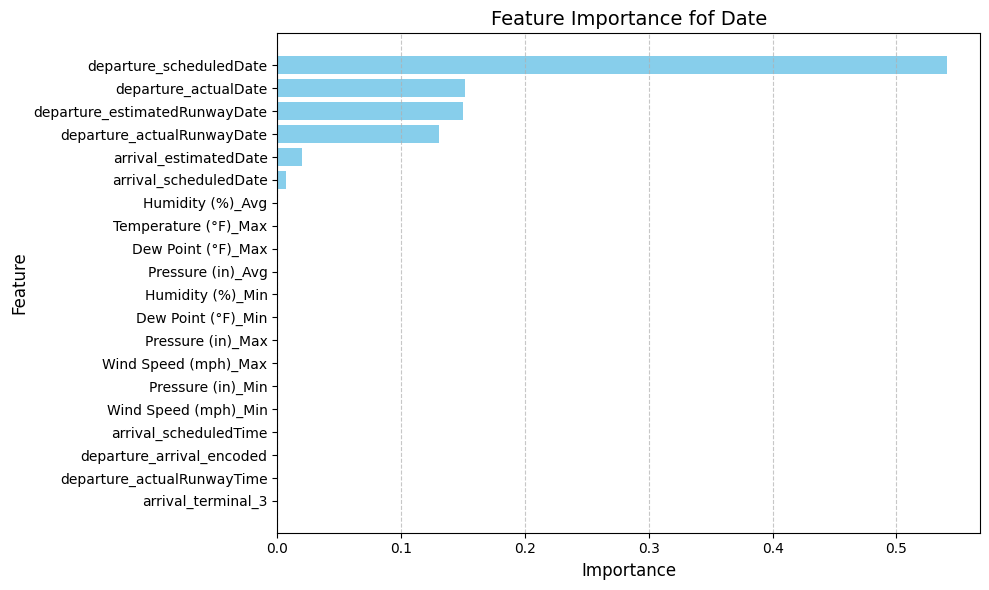

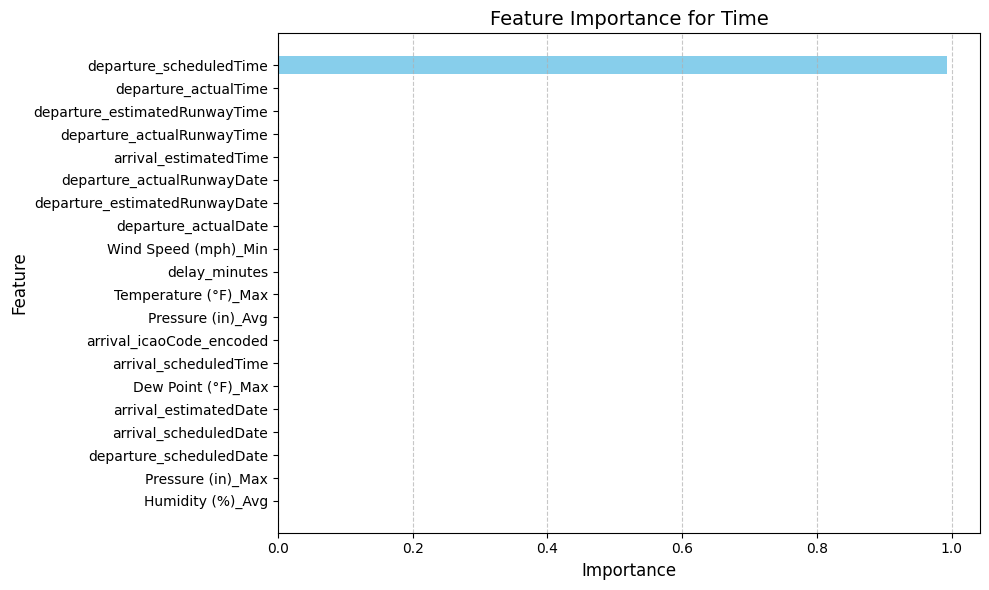

In [485]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


X_train, X_test, y_train_date, y_test_date = train_test_split(X, y_date, test_size=0.2, random_state=42)
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X, y_time, test_size=0.2, random_state=42)

# Step 4: Train RandomForestRegressor for 'departure_estimatedDate' and 'departure_estimatedTime'
rf_date = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=5, random_state=42)
rf_date.fit(X_train, y_train_date)

rf_time = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=5, random_state=42)
rf_time.fit(X_train_time, y_train_time)


# Step 4: Predict the missing values for 'departure_estimatedDate' and 'departure_estimatedTime'
y_pred_date = rf_date.predict(X_test)
y_pred_time = rf_time.predict(X_test_time)

# Convert datetime to timestamp for evaluation
y_test_date = y_test_date.astype('int64') // 10**9  # Convert to Unix timestamp (seconds)
y_pred_date = y_pred_date.astype('int64') // 10**9  # Convert to Unix timestamp (seconds)


# Ensure that y_test_time and y_pred_time are in datetime format if they are not
y_test_time = pd.to_datetime(y_test_time)
y_pred_time = pd.to_datetime(y_pred_time)

# Convert time to total seconds or minutes (depending on your requirement)
y_test_time_seconds = (y_test_time - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')  # Total seconds
y_pred_time_seconds = (y_pred_time - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')  # Total seconds


# Evaluating the 'departure_estimatedDate' model
print("Evaluating departure_estimatedDate model:")
accuracy_date = accuracy_score(y_test_date, y_pred_date)
print(f'Accuracy for departure_estimatedDate: {accuracy_date:.4f}')
print("Classification Report for departure_estimatedDate:")
print(classification_report(y_test_date, y_pred_date))
conf_matrix_date = confusion_matrix(y_test_date, y_pred_date)
print("Confusion Matrix for departure_estimatedDate:")
print(conf_matrix_date)

# Evaluating the 'departure_estimatedTime' model
print("\nEvaluating departure_estimatedTime model:")
accuracy_time = accuracy_score(y_test_time_seconds, y_pred_time_seconds)
print(f'Accuracy for departure_estimatedTime: {accuracy_time:.4f}')
print("Classification Report for departure_estimatedTime:")
print(classification_report(y_test_time_seconds, y_pred_time_seconds))
conf_matrix_time = confusion_matrix(y_test_time_seconds, y_pred_time_seconds)
print("Confusion Matrix for departure_estimatedTime:")
print(conf_matrix_time)




# Step 6: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_date.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_20_features = feature_importance.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance fof Date', fontsize=14)
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_time.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_20_features = feature_importance.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance for Time', fontsize=14)
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:

# Train RandomForestRegressor for 'departure_estimatedDate' and 'departure_estimatedTime' on the full dataset
rf_date = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=5, random_state=42)
rf_date.fit(X, y_date)  

rf_time = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=5, random_state=42)
rf_time.fit(X, y_time)  


In [596]:

missing_cols = set(X.columns) - set(X_missing_encoded.columns)
for col in missing_cols:
    X_missing_encoded[col] = np.nan  
    
X_missing_encoded = X_missing_encoded[X.columns]


predicted_dates = rf_date.predict(X_missing_encoded)
predicted_times = rf_time.predict(X_missing_encoded)

# Convert predicted dates to Unix timestamps (seconds)
predicted_dates = predicted_dates.astype('int64') // 10**9  # Convert to Unix timestamp (seconds)

# Convert predicted times to Datetime and round to the nearest minute
predicted_times_dt = pd.to_datetime(predicted_times, unit='s', origin='unix')

# Ensure we are working with a Series before using `.dt`
predicted_times_dt = pd.Series(predicted_times_dt)

# Round times to the nearest minute
rounded_times = predicted_times_dt.dt.round('min')

# Convert back to Unix timestamp (seconds)
predicted_times_seconds = (rounded_times - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Convert back to readable dates
readable_dates = pd.to_datetime(predicted_times_seconds, unit='s')
time_only = readable_dates.dt.strftime('%H:%M:%S')
time_only = list(time_only)
print(time_only)


predicted_dates = pd.to_datetime(predicted_dates, unit='s', origin='unix')
formatted_predicted_dates = predicted_dates.strftime('%d/%m/%Y')
formatted_predicted_dates = list(formatted_predicted_dates)
formatted_predicted_dates


['04:13:00', '04:00:00', '04:13:00', '09:49:00', '04:13:00', '04:11:00', '04:13:00', '09:50:00', '04:12:00', '04:16:00', '04:12:00', '04:14:00', '09:52:00', '04:12:00', '04:13:00', '04:15:00', '04:00:00', '09:50:00', '09:51:00', '04:13:00', '09:52:00', '09:49:00', '04:00:00', '09:52:00', '09:41:00', '04:13:00', '04:13:00', '04:13:00', '04:15:00', '09:50:00', '04:10:00', '09:52:00', '04:13:00', '03:17:00', '04:12:00', '23:43:00', '04:13:00', '04:14:00', '04:11:00', '09:49:00', '04:12:00', '04:00:00', '04:15:00', '01:05:00', '04:13:00', '03:59:00', '04:15:00', '10:31:00', '09:52:00', '04:03:00', '04:13:00', '04:02:00', '09:51:00', '04:00:00', '09:52:00', '04:12:00', '09:52:00', '04:15:00', '04:11:00', '04:12:00', '03:59:00', '00:39:00', '04:12:00', '00:29:00', '03:59:00', '04:11:00', '04:14:00', '09:52:00', '09:51:00', '04:13:00', '09:49:00', '09:52:00', '04:13:00', '04:11:00', '09:52:00', '04:15:00', '09:50:00', '09:49:00', '04:00:00', '04:13:00', '09:49:00', '22:29:00', '09:52:00', '04

['14/07/2023',
 '15/07/2023',
 '15/07/2023',
 '14/07/2023',
 '15/07/2023',
 '13/07/2023',
 '14/07/2023',
 '14/07/2023',
 '15/07/2023',
 '13/07/2023',
 '14/07/2023',
 '15/07/2023',
 '15/07/2023',
 '14/07/2023',
 '15/07/2023',
 '15/07/2023',
 '13/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '14/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '14/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '14/07/2023',
 '15/07/2023',
 '15/07/2023',
 '14/07/2023',
 '13/07/2023',
 '14/07/2023',
 '15/07/2023',
 '14/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '13/07/2023',
 '14/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '14/07/2023',
 '14/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/2023',
 '14/07/2023',
 '13/07/2023',
 '15/07/2023',
 '13/07/2023',
 '15/07/2023',
 '15/07/2023',
 '15/07/20

In [599]:
df.head()

,departure_iataCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_icaoCode,arrival_terminal,arrival_scheduledTime,arrival_estimatedTime,airline_icaoCode,codeshared_airline_icaoCode,departure_scheduledDate,departure_estimatedDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,delay_minutes,delay_category,is_delay,hourly_delay_cate,departure_arrival,departure_arrival_encoded,country
0,lhe,m,20:50:00,20:00:00,20:15:00,oerk,4,23:20:00,21:54:00,sva,NaN,20/07/2023,20/07/2023,20/07/2023,20/07/2023,20:15:00,20/07/2023,20:15:00,20/07/2023,20/07/2023,95,77,81,76.0,63,0,12,28.8,28.7,28.9,NaN,NaN,0.0,Low Delay,lhe -> oerk,122,Saudi Arabia
1,lhe,NaN,15:05:00,15:05:00,NaN,opkc,NaN,16:50:00,NaN,fjl,NaN,18/07/2023,18/07/2023,NaN,NaN,NaN,NaN,NaN,18/07/2023,NaN,95,77,81,73.8,63,0,17,28.8,28.7,28.8,NaN,NaN,NaN,Severe Delay,lhe -> opkc,136,Pakistan
2,lhe,NaN,09:50:00,NaN,NaN,opkc,NaN,11:35:00,NaN,fjl,NaN,23/07/2023,NaN,NaN,NaN,NaN,NaN,NaN,23/07/2023,NaN,95,73,79,71.2,56,0,14,28.9,28.8,29.0,NaN,NaN,NaN,Low Delay,lhe -> opkc,136,Pakistan
3,lhe,m,23:30:00,23:30:00,23:51:00,okkk,NaN,1:30:00,1:24:00,pia,NaN,26/07/2023,26/07/2023,26/07/2023,26/07/2023,23:51:00,26/07/2023,23:51:00,27/07/2023,27/07/2023,93,75,82,77.4,59,0,17,28.9,28.8,28.9,21.0,High Delay,1.0,Severe Delay,lhe -> okkk,125,Pakistan
4,lhe,m,11:35:00,17:15:00,NaN,omdb,1,14:00:00,NaN,sep,NaN,20/07/2023,20/07/2023,NaN,NaN,NaN,NaN,NaN,20/07/2023,NaN,95,77,81,76.0,63,0,12,28.8,28.7,28.9,NaN,NaN,NaN,Severe Delay,lhe -> omdb,127,Pakistan


In [600]:
# Ensure that time_only and formatted_predicted_dates lengths match the number of missing rows
missing_date_indices = df[df['departure_estimatedDate'].isna()].index
missing_time_indices = df[df['departure_estimatedTime'].isna()].index

# Check if the lengths match
if len(formatted_predicted_dates) < len(missing_date_indices) or len(time_only) < len(missing_time_indices):
    raise ValueError("The length of the predicted values does not match the number of missing rows.")

# Assign the predicted values to the missing rows
df.loc[missing_date_indices, 'departure_estimatedDate'] = formatted_predicted_dates[:len(missing_date_indices)]
df.loc[missing_time_indices, 'departure_estimatedTime'] = time_only[:len(missing_time_indices)]

# Check to confirm that missing values are filled
print(df[['departure_estimatedDate', 'departure_estimatedTime']].isna().sum())


departure_estimatedDate    0
departure_estimatedTime    0
dtype: int64


In [601]:

df[['departure_estimatedTime', 'departure_estimatedDate']]


,departure_estimatedTime,departure_estimatedDate
0,20:00:00,20/07/2023
1,15:05:00,18/07/2023
2,04:13:00,14/07/2023
3,23:30:00,26/07/2023
4,17:15:00,20/07/2023
...,...,...
51567,19:00:00,06/07/2024
51568,19:58:00,06/07/2024
51569,17:00:00,04/07/2024
51570,10:00:00,03/07/2024


In [ ]:

# df.to_csv('featuerdtrain.csv', index=False)


## departure_actualDate

In [813]:
df = pd.read_csv('featuerdtrain.csv')
df.head(3)

,departure_iataCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_icaoCode,arrival_terminal,arrival_scheduledTime,arrival_estimatedTime,airline_icaoCode,codeshared_airline_icaoCode,departure_scheduledDate,departure_estimatedDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,is_delay
0,lhe,m,20:50:00,20:00:00,20:15:00,oerk,4,23:20:00,21:54:00,sva,NaN,20/07/2023,20/07/2023,20/07/2023,20/07/2023,20:15:00,20/07/2023,20:15:00,20/07/2023,20/07/2023,95,77,81,76.0,63,0,12,28.8,28.7,28.9,0.0
1,lhe,NaN,15:05:00,15:05:00,NaN,opkc,NaN,16:50:00,NaN,fjl,NaN,18/07/2023,18/07/2023,NaN,NaN,NaN,NaN,NaN,18/07/2023,NaN,95,77,81,73.8,63,0,17,28.8,28.7,28.8,NaN
2,lhe,NaN,9:50:00,4:13:00,NaN,opkc,NaN,11:35:00,NaN,fjl,NaN,23/07/2023,14/07/2023,NaN,NaN,NaN,NaN,NaN,23/07/2023,NaN,95,73,79,71.2,56,0,14,28.9,28.8,29.0,NaN


In [814]:

print( len(df) )

nulls = df.isnull().sum()
nulls_percentage = (df.isnull().mean()) * 100

missing_summary = pd.DataFrame({'Missing Values': nulls, 'Percentage Missing': nulls_percentage})

missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Percentage Missing', ascending=False)



51572


,Missing Values,Percentage Missing
codeshared_airline_icaoCode,35689,69.202280
arrival_terminal,31007,60.123711
departure_terminal,21750,42.174048
arrival_estimatedTime,21364,41.425580
arrival_estimatedDate,21364,41.425580
departure_actualTime,20582,39.909253
departure_estimatedRunwayDate,20582,39.909253
departure_actualDate,20582,39.909253
departure_estimatedRunwayTime,20582,39.909253
departure_actualRunwayDate,20582,39.909253


In [818]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


DF_encoded = pd.get_dummies(df, columns=['departure_iataCode',  'departure_terminal', 
                                                    'arrival_terminal', 'codeshared_airline_icaoCode'])

# ----------------------- Apply LabelEncoder -----------------------
encoder = LabelEncoder()

DF_encoded['arrival_icaoCode_encoded'] = encoder.fit_transform(DF_encoded['arrival_icaoCode'].fillna('Unknown'))
DF_encoded['airline_icaoCode_encoded'] = encoder.fit_transform(DF_encoded['airline_icaoCode'].fillna('Unknown'))
# DF_encoded['departure_arrival_encoded'] = encoder.fit_transform(DF_encoded['departure_arrival'].fillna('Unknown'))

# Drop unnecessary columns
DF_encoded = DF_encoded.drop(columns=[ 'arrival_icaoCode', 'airline_icaoCode'])


# Convert datetime columns to Unix timestamp (seconds)
date_columns = ['departure_scheduledDate', 'departure_actualDate', 
                'arrival_scheduledDate', 'arrival_estimatedDate', 'departure_estimatedDate',
                'departure_estimatedRunwayDate', 'departure_actualRunwayDate']  
for col in date_columns:
    DF_encoded[col] = pd.to_datetime(DF_encoded[col], dayfirst=True, errors='coerce')
    # Convert to Unix timestamp (seconds)
    DF_encoded[col] = DF_encoded[col].astype('int64') // 10**9

# Convert time columns to total seconds
time_columns = ['departure_actualTime', 'arrival_scheduledTime', 'departure_scheduledTime', 'departure_estimatedTime',
                'arrival_estimatedTime', 'departure_estimatedRunwayTime', 'departure_actualRunwayTime']
for col in time_columns:
    DF_encoded[col] = pd.to_timedelta(DF_encoded[col], errors='coerce').dt.total_seconds()

DF_encoded.head()


,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_scheduledTime,arrival_estimatedTime,departure_scheduledDate,departure_estimatedDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,Temperature (°F)_Max,Dew Point (°F)_Min,Dew Point (°F)_Max,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Min,Wind Speed (mph)_Max,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,is_delay,departure_iataCode_isb,departure_iataCode_khi,departure_iataCode_lhe,departure_terminal_1,departure_terminal_h,departure_terminal_i,departure_terminal_m,departure_terminal_main,departure_terminal_t1,arrival_terminal_1,arrival_terminal_2,arrival_terminal_3,arrival_terminal_4,arrival_terminal_5,arrival_terminal_a,arrival_terminal_h,arrival_terminal_i,arrival_terminal_m,arrival_terminal_n,arrival_terminal_t2,arrival_terminal_t3,arrival_terminal_t4,arrival_terminal_ta,codeshared_airline_icaoCode_alk,codeshared_airline_icaoCode_baw,codeshared_airline_icaoCode_cca,codeshared_airline_icaoCode_csn,codeshared_airline_icaoCode_etd,codeshared_airline_icaoCode_exv,codeshared_airline_icaoCode_fdb,codeshared_airline_icaoCode_gfa,codeshared_airline_icaoCode_kne,codeshared_airline_icaoCode_oma,codeshared_airline_icaoCode_oms,codeshared_airline_icaoCode_pia,codeshared_airline_icaoCode_qtr,codeshared_airline_icaoCode_sva,codeshared_airline_icaoCode_tha,codeshared_airline_icaoCode_thy,codeshared_airline_icaoCode_tvs,codeshared_airline_icaoCode_uae,arrival_icaoCode_encoded,airline_icaoCode_encoded
0,75000.0,72000.0,72900.0,84000.0,78840.0,1689811200,1689811200,1689811200,1689811200,72900.0,1689811200,72900.0,1689811200,1689811200,95,77,81,76.0,63,0,12,28.8,28.7,28.9,0.0,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,31,84
1,54300.0,54300.0,NaN,60600.0,NaN,1689638400,1689638400,-9223372037,-9223372037,NaN,-9223372037,NaN,1689638400,-9223372037,95,77,81,73.8,63,0,17,28.8,28.7,28.8,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,50,30
2,35400.0,15180.0,NaN,41700.0,NaN,1690070400,1689292800,-9223372037,-9223372037,NaN,-9223372037,NaN,1690070400,-9223372037,95,73,79,71.2,56,0,14,28.9,28.8,29.0,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,50,30
3,84600.0,84600.0,85860.0,5400.0,5040.0,1690329600,1690329600,1690329600,1690329600,85860.0,1690329600,85860.0,1690416000,1690416000,93,75,82,77.4,59,0,17,28.9,28.8,28.9,1.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,35,65
4,41700.0,62100.0,NaN,50400.0,NaN,1689811200,1689811200,-9223372037,-9223372037,NaN,-9223372037,NaN,1689811200,-9223372037,95,77,81,76.0,63,0,12,28.8,28.7,28.9,NaN,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,38,80


In [819]:
DF_encoded.columns

Index(['departure_scheduledTime', 'departure_estimatedTime',
       'departure_actualTime', 'arrival_scheduledTime',
       'arrival_estimatedTime', 'departure_scheduledDate',
       'departure_estimatedDate', 'departure_actualDate',
       'departure_estimatedRunwayDate', 'departure_estimatedRunwayTime',
       'departure_actualRunwayDate', 'departure_actualRunwayTime',
       'arrival_scheduledDate', 'arrival_estimatedDate',
       'Temperature (°F)_Max', 'Dew Point (°F)_Min', 'Dew Point (°F)_Max',
       'Humidity (%)_Avg', 'Humidity (%)_Min', 'Wind Speed (mph)_Min',
       'Wind Speed (mph)_Max', 'Pressure (in)_Avg', 'Pressure (in)_Min',
       'Pressure (in)_Max', 'is_delay', 'departure_iataCode_isb',
       'departure_iataCode_khi', 'departure_iataCode_lhe',
       'departure_terminal_1', 'departure_terminal_h', 'departure_terminal_i',
       'departure_terminal_m', 'departure_terminal_main',
       'departure_terminal_t1', 'arrival_terminal_1', 'arrival_terminal_2',
       'arri

In [820]:

Y = DF_encoded[['departure_scheduledTime', 'departure_scheduledDate']]

X = DF_encoded.drop(columns=['departure_scheduledTime', 'departure_scheduledDate'])

Y = Y.dropna() 
X = X.loc[Y.index] 

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (51572, 66)
Shape of Y: (51572, 2)


In [812]:
from PIL import Image

# Load the image
image_path = "departure_actualTime Pairplot.png"
image = Image.open(image_path)

# Specify the number of parts (rows and columns)
rows = 4
columns = 4

# Get the dimensions of each part
part_width = image.width // columns
part_height = image.height // rows

# Loop to crop and save each part
for row in range(rows):
    for col in range(columns):
        left = col * part_width
        upper = row * part_height
        right = (col + 1) * part_width
        lower = (row + 1) * part_height
        
        # Crop the image
        cropped_image = image.crop((left, upper, right, lower))
        
        # Save the part
        cropped_image.save(f"image_part_{row}_{col}.png")

print("Image split into parts and saved.")


Image split into parts and saved.


In [ ]:

from sklearn.model_selection import cross_val_score

rf_cv_scores = cross_val_score(rf_date, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Average Accuracy: {rf_cv_scores.mean()}")


rf_cv_scores = cross_val_score(rf_time, X, y_time, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Average Accuracy: {rf_cv_scores.mean()}")

In [191]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")


grid_search_Time = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_Time.fit(X_Time_train, y_Time_train)
print(f"Best Hyperparameters: {grid_search_Time.best_params_}")


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features (though GaussianNB doesn't require scaling, it's often a good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train_scaled, y_train)

# Step 2: Predict and evaluate the model
y_pred = log_reg.predict(X_test_scaled)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8185
Classification Report:
                     precision    recall  f1-score   support

1689206400000000000       0.80      0.89      0.84         9
1689292800000000000       0.58      0.54      0.56        13
1689379200000000000       0.89      0.80      0.84        10
1689465600000000000       0.94      1.00      0.97        15
1689552000000000000       0.87      0.87      0.87        15
1689638400000000000       0.83      0.88      0.86        17
1689724800000000000       0.82      0.90      0.86        10
1689811200000000000       1.00      0.92      0.96        13
1689897600000000000       1.00      0.85      0.92        13
1689984000000000000       1.00      1.00      1.00        17
1690070400000000000       0.50      0.47      0.48        17
1690156800000000000       0.83      0.77      0.80        13
1690243200000000000       0.67      0.82      0.74        17
1690329600000000000       0.93      1.00      0.96        13
1690416000000000000       1.00      0.85    

Explained Variance Ratio for each component:
[0.08097107 0.05543962 0.04402858 0.03957332 0.03330911 0.03228003
 0.02878332 0.02663912 0.02519221 0.02226717 0.02209546 0.02053683
 0.02021416 0.01997285 0.01931662]

Cumulative Variance Explained:
[0.08097107 0.13641069 0.18043927 0.22001259 0.2533217  0.28560174
 0.31438506 0.34102418 0.36621639 0.38848356 0.41057902 0.43111585
 0.45133001 0.47130286 0.49061948]


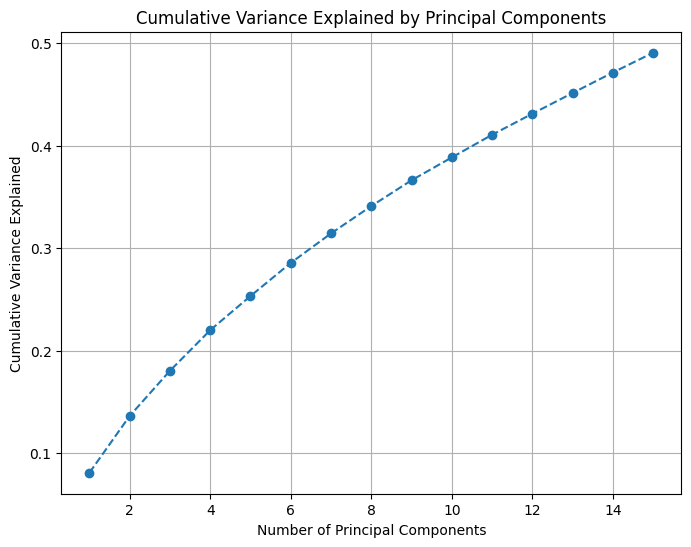

In [179]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
n_components = 15  # Choose the number of principal components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Explained Variance Ratio for each component:")
print(explained_variance)

print("\nCumulative Variance Explained:")
print(cumulative_variance)

# Optional: Visualize cumulative variance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()


In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred = lr.predict(X_test_scaled)

# Regression Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 31889779186862860419896390451200.0000
Mean Absolute Error (MAE): 4157687010135956.5000
R² Score: 0.6173
